In [1]:
import numpy as np
from scipy import misc
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from numpy import linalg as LA
from sklearn import linear_model as lm
%matplotlib inline


## b. Load training & test data

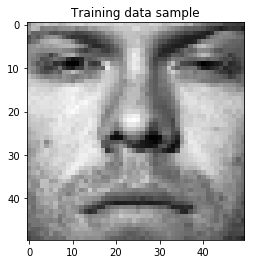

In [2]:
train_labels, train_data = [], []
for line in open('./faces/train.txt'):
    im = misc.imread(line.strip().split()[0])
    train_data.append(im.reshape(2500,))
    train_labels.append(line.strip().split()[1])
train_data, train_labels = np.array(train_data, dtype=float), np.array(train_labels, dtype=int)

plt.imshow(train_data[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.title('Training data sample')
plt.show()

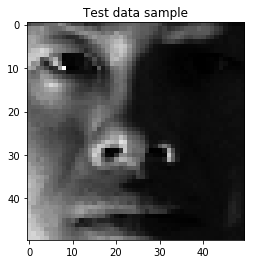

In [3]:
test_labels, test_data = [],[]
for line in open('./faces/test.txt'):
    im = misc.imread(line.strip().split()[0])
    test_data.append(im.reshape(2500,))
    test_labels.append(line.strip().split()[1])
test_data, test_labels = np.array(test_data, dtype=float), np.array(test_labels, dtype=int)

plt.imshow(test_data[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.title('Test data sample')
plt.show()

## c. Average face

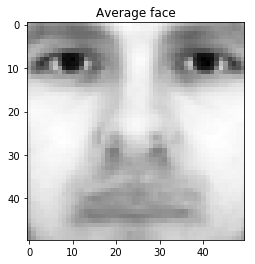

In [4]:
avg_face = train_data.mean(axis=0)
plt.imshow(avg_face.reshape(50,50), cmap = cm.Greys_r)
plt.title('Average face')
plt.show()

## d. Mean subtraction

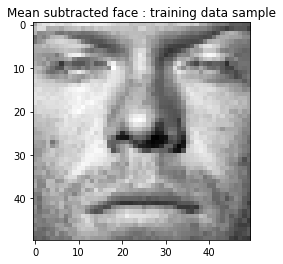

In [5]:
mean_subtracted_faces_train = train_data - avg_face
plt.imshow(mean_subtracted_faces_train[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.title('Mean subtracted face : training data sample')
plt.show()

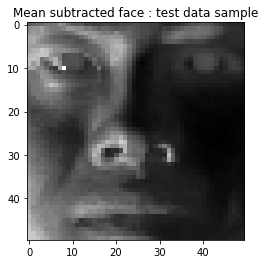

In [6]:
mean_subtracted_faces_test = test_data - avg_face
plt.imshow(mean_subtracted_faces_test[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.title('Mean subtracted face : test data sample')
plt.show()

## e. Eigenface

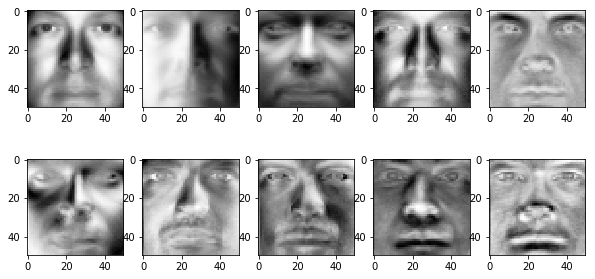

In [7]:
U, s, V = np.linalg.svd(mean_subtracted_faces_train, full_matrices=True)

plotnum=1
fig = plt.figure(figsize=(10, 5))
ind = 0
for i in range(2):
    for j in range(5):
        fig.add_subplot(2, 5, plotnum)
        plt.imshow(V[ind,:].reshape(50,50), cmap = cm.Greys_r)
        ind+=1
        plotnum+=1
plt.show()


## f. Low rank approximation

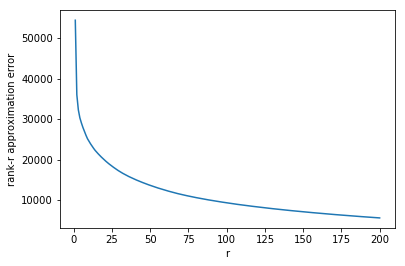

In [8]:
errors = []
for r in range(1,201):
    r_approx = np.dot(np.dot(U[:,:r ],s[:r]*np.identity(r)),V[:r,:])
    errors.append(LA.norm(mean_subtracted_faces_train - r_approx,'fro'))
    
plt.plot(range(1,201),errors)
plt.ylabel('rank-r approximation error')
plt.xlabel('r')
plt.show()

## g. Eigenface Feature

In [9]:
def gen_rdim_feature(X,V,r):
    return np.matmul(X,np.transpose(V[:r,:]))


## h. Face recognition

In [10]:
F = gen_rdim_feature(train_data,V,10)
F_test = gen_rdim_feature(test_data,V,10)

In [11]:
logReg = lm.LogisticRegression(multi_class='ovr')
accuracy = []
for r in range(1,201):
    logReg.fit(gen_rdim_feature(mean_subtracted_faces_train,V,r),train_labels)
    accuracy.append(logReg.score(gen_rdim_feature(mean_subtracted_faces_test,V,r),test_labels)*100)
print(accuracy)

[14.000000000000002, 12.0, 12.0, 18.0, 42.0, 35.0, 50.0, 64.0, 72.0, 79.0, 81.0, 82.0, 85.0, 85.0, 86.0, 89.0, 87.0, 84.0, 85.0, 87.0, 89.0, 86.0, 89.0, 89.0, 90.0, 90.0, 90.0, 90.0, 91.0, 92.0, 92.0, 93.0, 91.0, 90.0, 91.0, 92.0, 95.0, 92.0, 94.0, 96.0, 93.0, 96.0, 97.0, 95.0, 93.0, 93.0, 96.0, 92.0, 92.0, 91.0, 94.0, 94.0, 92.0, 93.0, 92.0, 93.0, 93.0, 92.0, 89.0, 85.0, 90.0, 89.0, 89.0, 92.0, 91.0, 93.0, 92.0, 94.0, 92.0, 92.0, 89.0, 90.0, 90.0, 90.0, 86.0, 87.0, 86.0, 86.0, 86.0, 85.0, 85.0, 85.0, 86.0, 91.0, 91.0, 92.0, 91.0, 91.0, 92.0, 91.0, 90.0, 92.0, 93.0, 92.0, 92.0, 93.0, 93.0, 93.0, 93.0, 93.0, 96.0, 93.0, 93.0, 94.0, 94.0, 94.0, 94.0, 93.0, 92.0, 91.0, 92.0, 93.0, 93.0, 95.0, 94.0, 94.0, 94.0, 95.0, 95.0, 95.0, 95.0, 95.0, 95.0, 94.0, 94.0, 94.0, 96.0, 94.0, 96.0, 97.0, 97.0, 97.0, 97.0, 97.0, 97.0, 95.0, 95.0, 95.0, 96.0, 96.0, 96.0, 96.0, 96.0, 96.0, 96.0, 96.0, 96.0, 95.0, 96.0, 97.0, 97.0, 97.0, 97.0, 97.0, 97.0, 97.0, 97.0, 97.0, 97.0, 97.0, 97.0, 97.0, 97.0, 97.0, 9

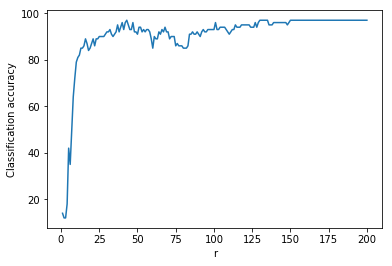

In [12]:
plt.plot(range(1,201),accuracy)
plt.ylabel('Classification accuracy')
plt.xlabel('r')
plt.show()